In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg

#-- Visualización de datos
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
#import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool

#-- Aprendizaje automático 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#-- Evaluación de los modelos 
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report

In [29]:
#IMPORTACION DE DATA ↓
df=pd.read_csv(r"C:\Users\ALEXIS\Documents\AXIELS\Documentos Alexis\Estudio\Cursos virtuales\datos y visualizacion MIN-TIC\python\friance_new.csv",sep=",",encoding = "ISO-8859-1")

print(df.head(2))
print(df.columns.unique())

C:\Users\ALEXIS\AppData\Local\Temp\ipykernel_4296\75632546.py:2: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



   Surname  CreditScore   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0     2023        668.0  33.0     3.0      0.0            2.0          1   
1     2024        627.0  33.0     1.0      0.0            2.0          1   

   IsActiveMember EstimatedSalary  Exited  ... France Germany Spain Female  \
0               0       181449.97       0  ...      1       0     0      0   
1               1         49503.5       0  ...      1       0     0      0   

  Male  Mem__no__Products  Cred_Bal_Sal  Bal_sal                 Tenure_Age  \
0    1                0.0           0.0      0.0   9.090.909.090.909.090,00   
1    1                2.0           0.0      0.0  30.303.030.303.030.300,00   

   Age_Tenure_product  
0                99.0  
1                33.0  

[2 rows x 25 columns]
Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfid

Limpieza de DATA

In [30]:
print(df.isna().sum())# →errores de df

#eliminar columnas no utiles
df = df.drop(['Exited', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 
        'Surname_tfidf_3', 'Surname_tfidf_4', 'Mem__no__Products', 
        'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age', 'Age_Tenure_product'],axis=1)

print(df.columns)

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64
Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Female', 'Male'],
      dtype='object')


In [31]:
#REMANE COLUMNAS↓

Change_info= {'Surname':'Apellido',
        'CreditScore':'Calif_Credito',
        'Age':'Edad',
        'Tenure':'Antiguedad',
        'Balance':'Saldo',
        'NumOfProducts':'Cantidad_Productos',
        'HasCrCard':'Tiene_Tarjeta_Cred',
        'IsActiveMember':'Es_Miembro_Activo',
        'EstimatedSalary':'Estimac_Salarial',
        'France':'Francia',
        'Germany':'Alemania',
        'Spain':'España',
        'Female':'Mujer',
        'Male':'Hombre'}

df.rename(columns=Change_info, inplace=True)
print(df.columns)

Index(['Apellido', 'Calif_Credito', 'Edad', 'Antiguedad', 'Saldo',
       'Cantidad_Productos', 'Tiene_Tarjeta_Cred', 'Es_Miembro_Activo',
       'Estimac_Salarial', 'Francia', 'Alemania', 'España', 'Mujer', 'Hombre'],
      dtype='object')


In [32]:
df.rename(columns=Change_info, inplace=True)
#print(df.columns)

#ordenar la columna al final
column_order = [
        'Edad',
        'Antiguedad',
        'Saldo',
        'Cantidad_Productos',
        'Tiene_Tarjeta_Cred',
        'Estimac_Salarial',
        'Francia',
        'Alemania',
        'España',
        'Mujer',
        'Hombre',
        'Es_Miembro_Activo']  # Aquí 'B' se moverá al final

df = df[column_order]

In [33]:
#Cambias valores str a float
df['Estimac_Salarial'] = df['Estimac_Salarial'].str.replace('.', '').astype(float)
df = df.dropna()
print(df.isnull().sum())
#ACA ESTA EL ERROR↑
print(df[['Edad','Saldo','Antiguedad','Cantidad_Productos']].describe().round(2))
print(df[['Estimac_Salarial']])

#en este pequeño analisis se denota que la media(mean) de edades se encuentra en 38 años osea que el promedio 
#general de edades esta en ese valor, ademas que  la desviacion de estandar esta 8,97 años osea que los valoresmas dispersos
#frente a la mediana es 8 años, el min muestra que las personas con menor edad son las de 18 años y de mayor edad
#son las de 92 años por otro lado  el saldo minimo en cuentas es de 0 y el maximo es de 250 mil euros. por otro lado 
# el  maximo de los son 10 y la cantidad de productos maxima es 4 por pernona.


Edad                  0
Antiguedad            0
Saldo                 0
Cantidad_Productos    0
Tiene_Tarjeta_Cred    0
Estimac_Salarial      0
Francia               0
Alemania              0
España                0
Mujer                 0
Hombre                0
Es_Miembro_Activo     0
dtype: int64
           Edad      Saldo  Antiguedad  Cantidad_Productos
count  65536.00   65536.00    65536.00            65536.00
mean      38.16   55731.71        5.02                1.55
std        8.90   62871.76        2.80                0.55
min       18.00       0.00        0.00                1.00
25%       32.00       0.00        3.00                1.00
50%       37.00       0.00        5.00                2.00
75%       42.00  120165.40        7.00                2.00
max       92.00  238387.56       10.00                4.00
        Estimac_Salarial
32768         17245939.0
32769         10170419.0
32770         12674333.0
32771         15983023.0
32772           519995.0
...               

Es_Miembro_Activo
0    32918
1    32618
dtype: int64


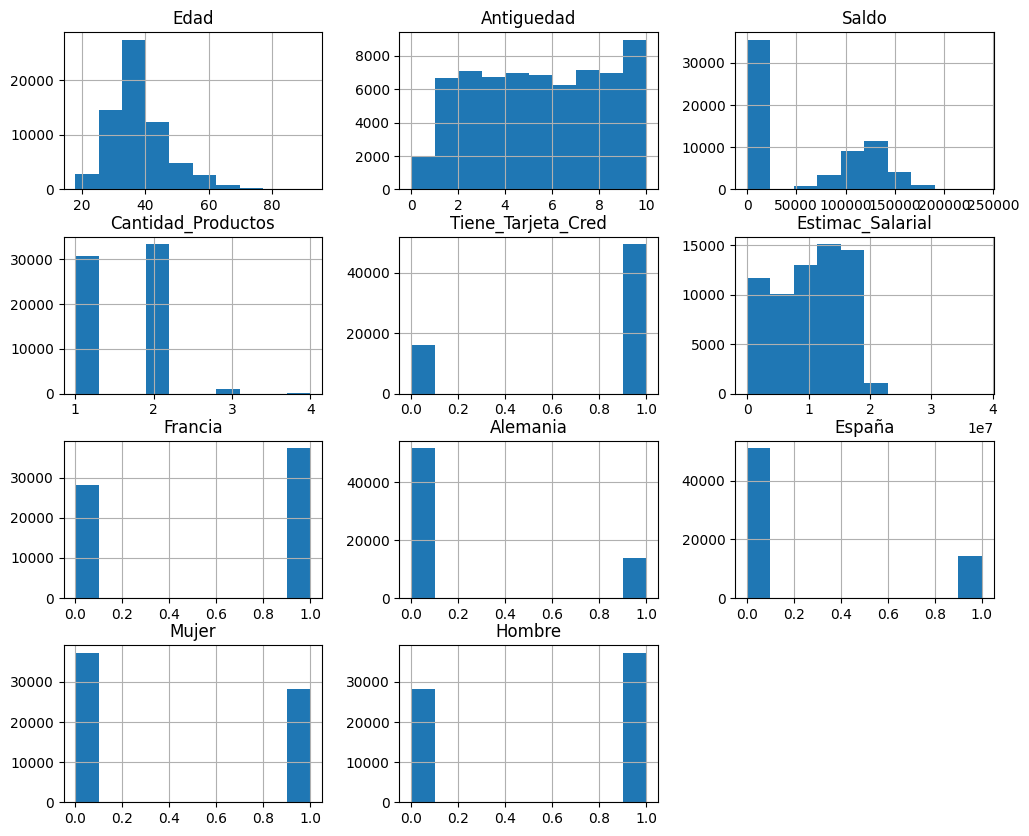

In [44]:
#GRAFICOS
#interaccion de variables.
print(df.groupby("Es_Miembro_Activo").size())
df.drop(columns=["Es_Miembro_Activo"]).hist(figsize=(12, 10))
plt.show()



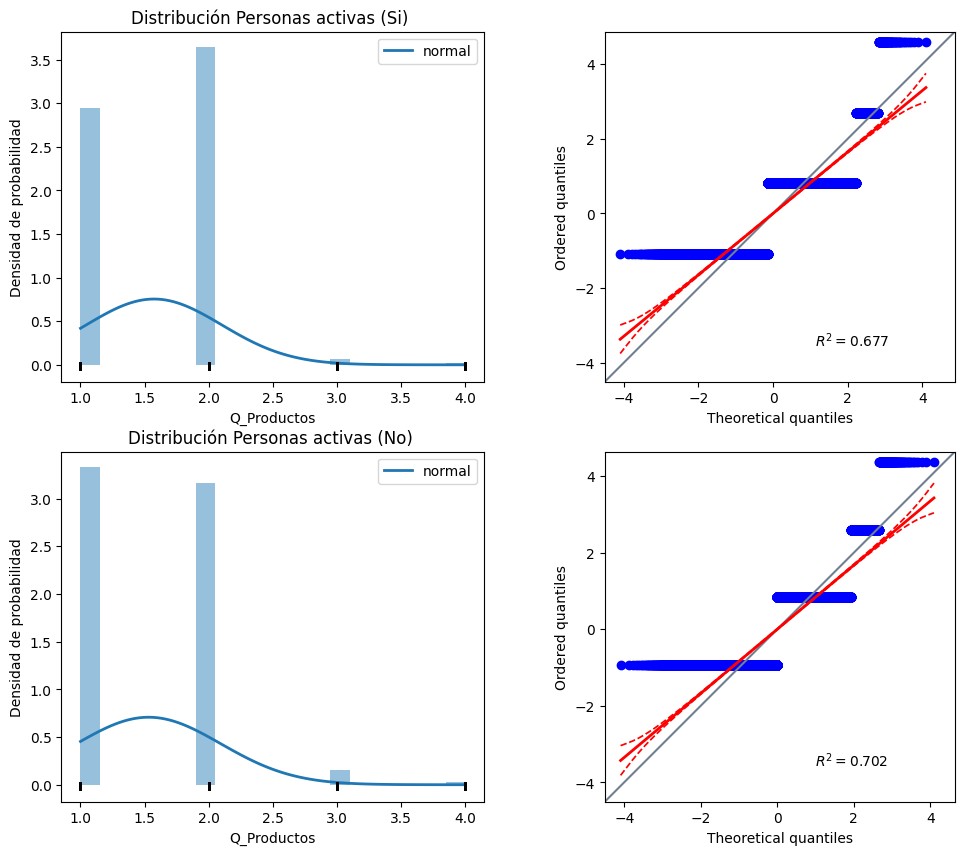

5.359875644909321e-23
Rechazamos la hipotesis nula de que las muestras son diferentes por el valor deñp_vale es :  {5.359875644909321e-23}


In [38]:

#1) Grafica de distribucion de probabilidad.

'''hipotesis los miembros activos  manejan mayor cantidad de productos con respecto a los no activos.'''


fig,axs=plt.subplots(2,2, figsize=(12,10))

#Gráfico de distribución qq-plot para "Si ó 1"
miembro_On=df.loc[df.Es_Miembro_Activo ==1,"Cantidad_Productos"]
mu,sigma=stats.norm.fit(miembro_On) #→ Dsitribucion normal 

#sacamos los valores de x, y de nuestra distribución
x_hat=np.linspace(min(miembro_On),max(miembro_On),num=100)
y_hat=stats.norm.pdf(x_hat,mu,sigma)
axs[0,0].plot(x_hat,y_hat,linewidth=2,label='normal')
axs[0,0].hist(x=miembro_On,density=True,bins=20,color="#3182bd", alpha=0.5)
axs[0,0].plot(miembro_On,np.full_like(miembro_On,-0.01),'|k',markeredgewidth=1)
axs[0,0].set_title("Distribución Personas activas (Si) ")
axs[0,0].set_xlabel('Q_Productos')
axs[0,0].set_ylabel('Densidad de probabilidad')
axs[0,0].legend()

pg.qqplot(miembro_On,dist='norm', ax=axs[0,1])

#Gráfico de distribución qq-plot para "No ó 0"
miembro_Off=df.loc[df.Es_Miembro_Activo ==0,"Cantidad_Productos"]
mu,sigma=stats.norm.fit(miembro_Off)

#sacamos los valores de x, y de nuestra distribución
x_hat=np.linspace(min(miembro_Off),max(miembro_Off),num=100)
y_hat=stats.norm.pdf(x_hat,mu,sigma)
axs[1,0].plot(x_hat,y_hat,linewidth=2,label='normal')
axs[1,0].hist(miembro_Off,density=True,bins=20,color="#3182bd", alpha=0.5)
axs[1,0].plot(miembro_Off,np.full_like(miembro_Off,-0.01),'|k',markeredgewidth=1)
axs[1,0].set_title("Distribución Personas activas (No) ")
axs[1,0].set_xlabel('Q_Productos')
axs[1,0].set_ylabel('Densidad de probabilidad')
axs[1,0].legend()
pg.qqplot(miembro_Off,dist='norm', ax=axs[1,1])
plt.show()

statics=pg.ttest(miembro_On,miembro_Off,alternative='two-sided',correction=False)
print(statics['p-val'].values[0])

alpha=0.05
p_value =float( statics['p-val'].values[0]) #extraccion de valores

#respuesta de la hipotesis
if p_value<alpha:
        print("Rechazamos la hipotesis nula de que las muestras son diferentes por el valor deñp_vale es : ",{p_value})
else:
        print("No hay suficiente evidencia para  rechazar la hipotesis nula pero el valor de p_value es : ",{p_value})


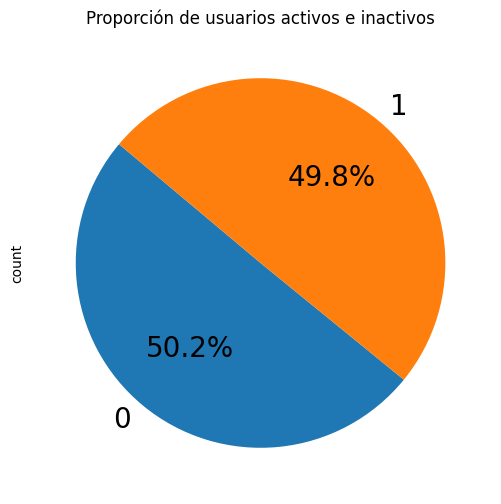

In [45]:

#2)Grafica distribucon de torta
#-- Creamos un dataframe

def bar_plot_b(df,GB_col,col,agg,title):   
        df_plot = pd.DataFrame(df.groupby(df[GB_col])[col].agg(agg))
        x_item = list(df_plot.index)
        x_item = [str(i) for i in x_item]
        y_item = list(df_plot[col])
        output_file("bar_categorical.html")

#-- Especificar la fuente y el color
        source = ColumnDataSource(data=dict(x_item=x_item, y_item=y_item, 
                                        color=source))
#-- Crear una figura
        plot = figure(x_range=x_item ,plot_width=500, plot_height=400,title = title, x_axis_label = GB_col)

#-- Crear un gráfico de barras
        plot.vbar(x='x_item', top='y_item', width=0.5, color='color',source=source)

#-- Hover tool con modo vline 
        hover = HoverTool(tooltips=[(title[0:20], '@y_item')], mode='vline')

        plot.add_tools(hover)

#-- Mostrar los resultados 
        output_notebook()
        show(plot, notebook_handle=True )

def pie_chart(df,col, title):
        counts = df[col].value_counts()
        counts.plot(kind='pie',autopct='%1.1f%%',fontsize=20, figsize=(6, 6),startangle=140) 
        plt.title(title)
        plt.show()
        
pie_chart(df,'Es_Miembro_Activo','Proporción de usuarios activos e inactivos')   


Correlacion de variables

                        Edad  Antiguedad     Saldo  Cantidad_Productos  \
Edad                1.000000   -0.018693  0.061937           -0.100640   
Antiguedad         -0.018693    1.000000 -0.009387            0.005620   
Saldo               0.061937   -0.009387  1.000000           -0.363542   
Cantidad_Productos -0.100640    0.005620 -0.363542            1.000000   
Tiene_Tarjeta_Cred -0.012714    0.007883 -0.018020            0.009635   
Estimac_Salarial   -0.010813   -0.003297  0.013735           -0.003416   
Francia            -0.066501    0.005995 -0.332747            0.067286   
Alemania            0.091667   -0.011235  0.535371           -0.107094   
España             -0.010642    0.003878 -0.128607            0.024861   
Mujer               0.064611   -0.004739  0.014373           -0.025397   
Hombre             -0.064611    0.004739 -0.014373            0.025397   
Es_Miembro_Activo   0.007808   -0.006436 -0.017337            0.038559   

                    Tiene_Tarjeta_Cre

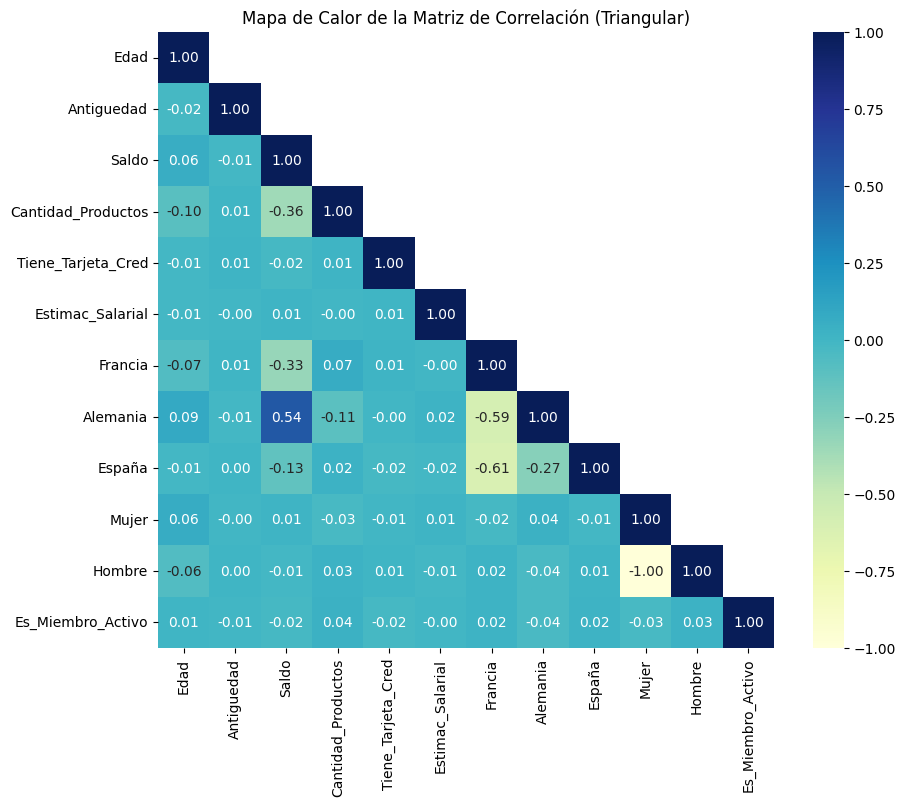

In [39]:

# Imprimir la matriz de correlación

df_corr = df.corr()
print(df_corr) 

# Crear una máscara para la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(df_corr, dtype=bool), k=1)
# Configurar la figura para el mapa de calor
plt.figure(figsize=(10, 8))
# Graficar el mapa de calor
sns.heatmap(df_corr, cmap='YlGnBu', annot=True, fmt=".2f", mask=mask, square=True)
# Añadir título
plt.title('Mapa de Calor de la Matriz de Correlación (Triangular)')
plt.show()

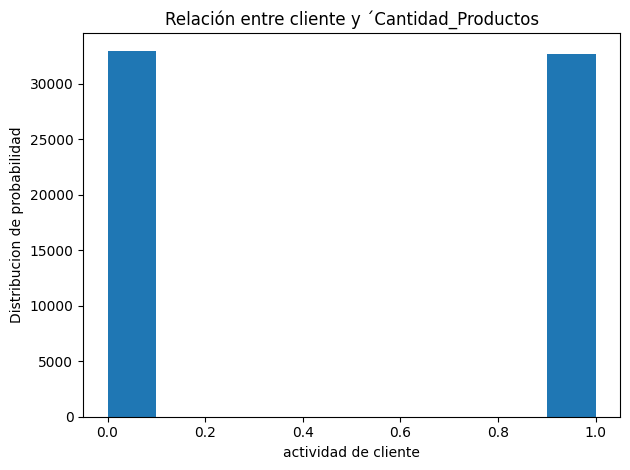

In [41]:
#Crear histograma de distribución  R.cliente y Cantidad Pro.
plt.hist(df['Es_Miembro_Activo'],bins=10)
plt.title('Relación entre cliente y ´Cantidad_Productos')
plt.xlabel('actividad de cliente')
plt.ylabel('Distribucion de probabilidad')
plt.tight_layout()
plt.show()


#COMENTARIOS DE GRAFICOS

#GRAFICO DE DISTRIBUCION DE PROBABILIDAD: 
#Al establecer este grafico se denota que las personas activas  tienen una distribucion de probabilidad maxima 
# de 3.6 en su mayoria con relacion al manejo de 1 a 2 productos , por otro lado la distribucion de probabilidad 
# para personas no activas no supero el 3.5 y  a diferencia de las personas activas las no activas tuvieron una 
# cantidad  mayor de manejo de un producto con respecto al manejo de multiples prodcutos pero un dato interesante
#es que las personas  que actualmente ya no son activas  tenian maor posibilidad de manejas hasta 4 productos.

#en cuanto a la prueba del alpha con respecto al p_value, es que  no se puede afirmar la hipotesis  ya que existe una 
#varianza en la data  entre productos.

#GRAFICO DE TORTA :
#se establecer que la distribucion de la columna de valores discretos es de 
# 0 → 87732 ó el 50.1% vs
# 1 → 87296 ó el 49.9%

#GRAFICOS MAPA DE CALOR
#Se interpreta que existe poca corelacion de las variables dependiendtes con la independiente


In [43]:

#MODELO DE REGRESION LOGISTICA.

#variables  de objeto
#solucion de error

#print(df.isna().sum())

print(df.isnull().sum())
print(df.info())

x=df.drop('Es_Miembro_Activo',axis=1).values
y=df['Es_Miembro_Activo'].values
x.shape


#separar el conjunto de datos en entrenamiento y test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

#entrenamos el modelo
modelo=LogisticRegression(random_state=0)
modelo.fit(X_train,y_train)

#testear el modelo
predict=modelo.predict(X_test)
print(predict[:20])
print(y_test[:20])

#vamos a medirla efectividad del modelo

print("este es el valor de la precisión según logisticregresion ",accuracy_score(y_test,predict))

#PREDICCIONES

print("Predicciones del modelo")
#1)
p1=pd.DataFrame({'Edad':[30.0],
        'Antiguedad':[1.0],
        'Saldo':[800000.35],
        'Cantidad_Productos':[2.0],
        'Tiene_Tarjeta_Cred':[1],
        'Estimac_Salarial':[3500000.0],
        'Francia':[0],
        'Alemania':[1],
        'España':[0],
        'Mujer':[0],
        'Hombre':[1]})
prediccion_p1 = modelo.predict(p1.values)
print(f"p1:\n{p1}\nPredicción: {prediccion_p1}\n")

#2)
#esto crea un nuevo df variable=pd.Dataframe
p2=pd.DataFrame({'Edad':[25.0],
        'Antiguedad':[1.0],
        'Saldo':[1500000.0],
        'Cantidad_Productos':[2.0],
        'Tiene_Tarjeta_Cred':[1],
        'Estimac_Salarial':[10000000],
        'Francia':[0],
        'Alemania':[1],
        'España':[0],
        'Mujer':[0],
        'Hombre':[1]})

prediccion_p2 = modelo.predict(p2.values)
print(f"p2:\n{p2}\nPredicción: {prediccion_p2}\n")

#X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
#modelo.predict(X_new)


#METRICAS:

print("El valor del  accuracy_score: ",accuracy_score(y_test, predict))
# la métrica accuracy representa el porcentaje total de valores 
# correctamente clasificados, tanto positivos como negativos.

print("EL Valor del precision_score: ",precision_score(y_test, predict))
#La métrica de precisión es utilizada para poder saber qué porcentaje de 
# valores que se han clasificado como positivos son realmente positivos.

print("El valor de recall es: ",recall_score(y_test, predict))
#La métrica de recall, también conocida como el ratio de verdaderos 
#positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados

print("El valor de f1score es: ",f1_score(y_test, predict))
#Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar
#está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho
#más objetivo.

print("El valor de MSE es : ",mean_squared_error(y_test, predict))
#MSE: Media de los errores cuadrados,

print("El valor de R2 es : ",r2_score(y_test, predict))
# Indica la calidad del ajuste del modelo

print("La matriz de confusion es: ",confusion_matrix(y_test, predict).ravel())


Edad                  0
Antiguedad            0
Saldo                 0
Cantidad_Productos    0
Tiene_Tarjeta_Cred    0
Estimac_Salarial      0
Francia               0
Alemania              0
España                0
Mujer                 0
Hombre                0
Es_Miembro_Activo     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 65536 entries, 32768 to 163839
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                65536 non-null  float64
 1   Antiguedad          65536 non-null  float64
 2   Saldo               65536 non-null  float64
 3   Cantidad_Productos  65536 non-null  float64
 4   Tiene_Tarjeta_Cred  65536 non-null  int64  
 5   Estimac_Salarial    65536 non-null  float64
 6   Francia             65536 non-null  int64  
 7   Alemania            65536 non-null  int64  
 8   España              65536 non-null  int64  
 9   Mujer               65536 non-null  int64  
 1